In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import plotly.tools as tls
import copy
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('../input/Altra_Claims - Cleaner.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3325: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



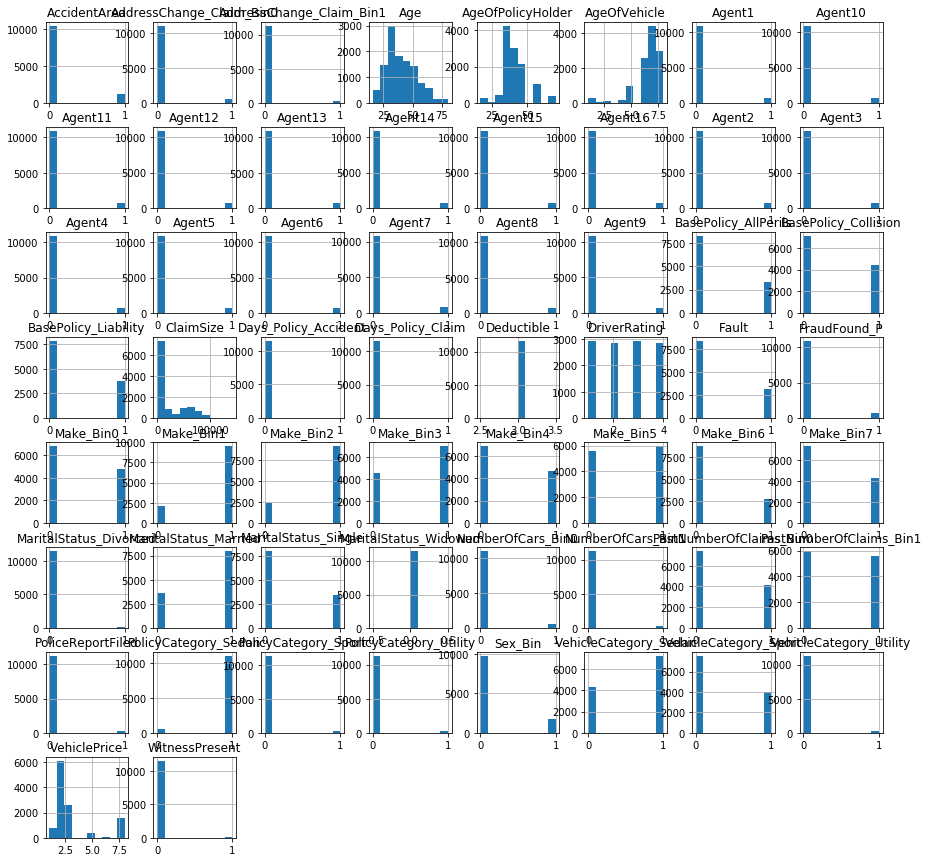

In [3]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head()

PolicyCategory_Utility      ...       FraudFound_P
0                       0      ...                  1
1                       0      ...                  1
2                       0      ...                  1
3                       1      ...                  1
4                       0      ...                  1

[5 rows x 58 columns]

Int64Index([0, 1], dtype='int64')
[10880   685]


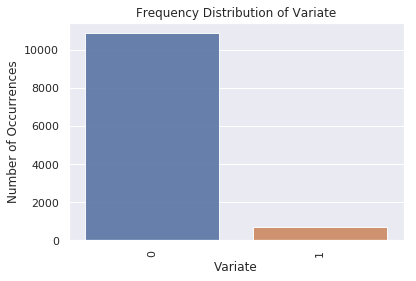

In [6]:
import seaborn as sns

variateName = 'FraudFound_P'

# Bar Graph
variate = df[variateName].value_counts()
sns.set(style="darkgrid")
sns.barplot(variate.index, variate.values, alpha=0.9)
plt.title('Frequency Distribution of Variate')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Variate', fontsize=12)
plt.xticks(rotation=90)
print(variate.index)
print(variate.values)
plt.show()

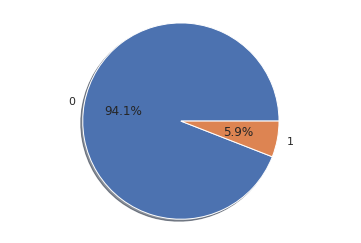

In [7]:
# Pi Chart
labels = df[variateName].astype('category').cat.categories.tolist()
counts = df[variateName].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import plotly.tools as tls

In [9]:
# Load data
X = df.iloc[:1370,:-1]
y = df.iloc[:1370,-1]

In [10]:
model= RandomForestClassifier(n_estimators=500,random_state=0)
#model.fit(X_train,y_train)
model.fit(X,y)
#pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Fault                       0.121828
ClaimSize                   0.109072
Age                         0.088589
BasePolicy_Liability        0.042835
DriverRating                0.042304
AgeOfVehicle                0.042197
AgeOfPolicyHolder           0.036275
VehiclePrice                0.033492
VehicleCategory_Sport       0.027890
AddressChange_Claim_Bin1    0.022760
PastNumberOfClaims_Bin0     0.020403
VehicleCategory_Sedan       0.019912
PastNumberOfClaims_Bin1     0.018943
BasePolicy_AllPerils        0.018599
BasePolicy_Collision        0.017032
Make_Bin5                   0.014904
Agent11                     0.013409
Make_Bin4                   0.013381
Sex_Bin                     0.013011
MaritalStatus_Married       0.012895
MaritalStatus_Single        0.012895
AccidentArea                0.012741
Make_Bin1                   0.012378
Make_Bin0                   0.012078
Make_Bin3                   0.011301
Make_Bin6                   0.011093
Make_Bin7                   0.010517
A

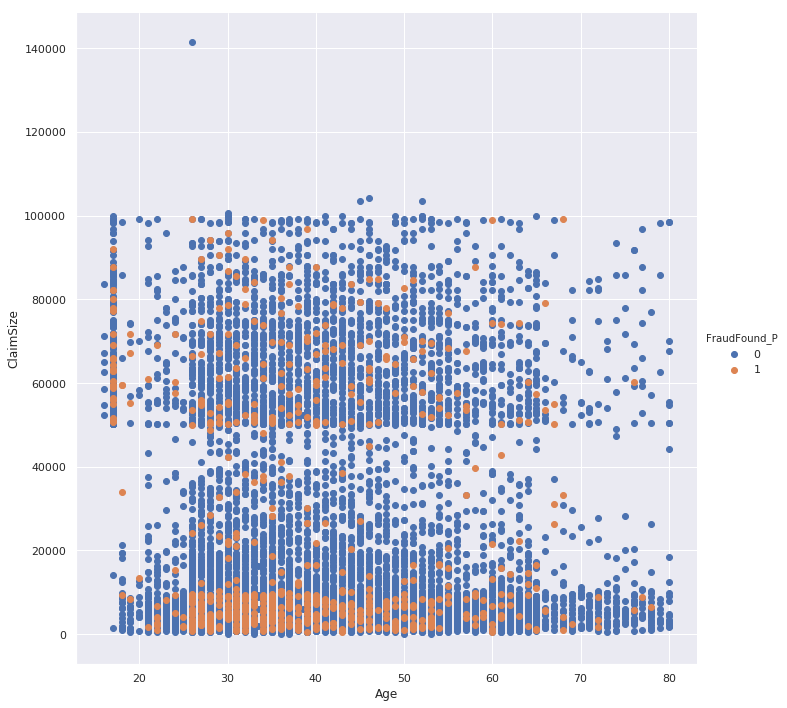

In [11]:
sns.FacetGrid(df, hue="FraudFound_P", height=10) \
   .map(plt.scatter, "Age", "ClaimSize") \
   .add_legend()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
df_top = df.loc[:1369,['Fault','ClaimSize','Age','BasePolicy_Liability','DriverRating','AgeOfVehicle']]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [14]:
x_train,x_test,y_train,y_test = train_test_split(df_top,y,test_size=0.25,random_state=0)

In [15]:
df_full = df.loc[::,['Fault','ClaimSize','Age','BasePolicy_Liability','DriverRating','AgeOfVehicle']]

In [16]:
clf = RandomForestClassifier(n_estimators=1,random_state=1)
clf.fit(df_top,y)
#prediction = clf.predict(x_test)
#accuracy = accuracy_score(prediction,y_test)
pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)

ClaimSize               0.374260
Age                     0.229815
Fault                   0.149700
BasePolicy_Liability    0.109841
DriverRating            0.078631
AgeOfVehicle            0.057753
dtype: float64

In [17]:
cm = confusion_matrix(prediction,y_test)


prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: \n',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

NameError: name 'prediction' is not defined

In [18]:
estimator = clf.estimators_[0]
list(df_full.columns.values)

['Fault',
 'ClaimSize',
 'Age',
 'BasePolicy_Liability',
 'DriverRating',
 'AgeOfVehicle']

In [19]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(df_full.columns.values),
                class_names = ['No Fraud','Fraud'],
                rounded = True, proportion = False, 
                filled = True, max_depth = 5)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')